In [1]:
import numpy as np
import matplotlib.pyplot as plt
import flopy
from flopy.plot import styles

In [2]:
name = "at"
ws = "./"

In [3]:
sim = flopy.mf6.MFSimulation.load(sim_name=name, sim_ws=ws)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package oc...
    loading package lak...
    loading package rch...
    loading package sfr...
    loading package maw...
    loading package mvr...
    loading package obs...
  loading ims package at...


In [4]:
sim.run_simulation()

FloPy is using the following executable to run the model: /Users/jdhughes/.local/bin/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.3.0 03/04/2022

   MODFLOW 6 compiled Mar 07 2022 13:50:09 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.5.0
                             Build 20211109_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Gov

(True, [])

In [5]:
gwf = sim.get_model()

In [6]:
times = gwf.output.head().get_times()
times

[1.0, 2.0, 3.0, 4.0]

In [7]:
levels = np.arange(0, 20, 1)

In [8]:
hobj = gwf.output.head()
cobj = gwf.output.budget()

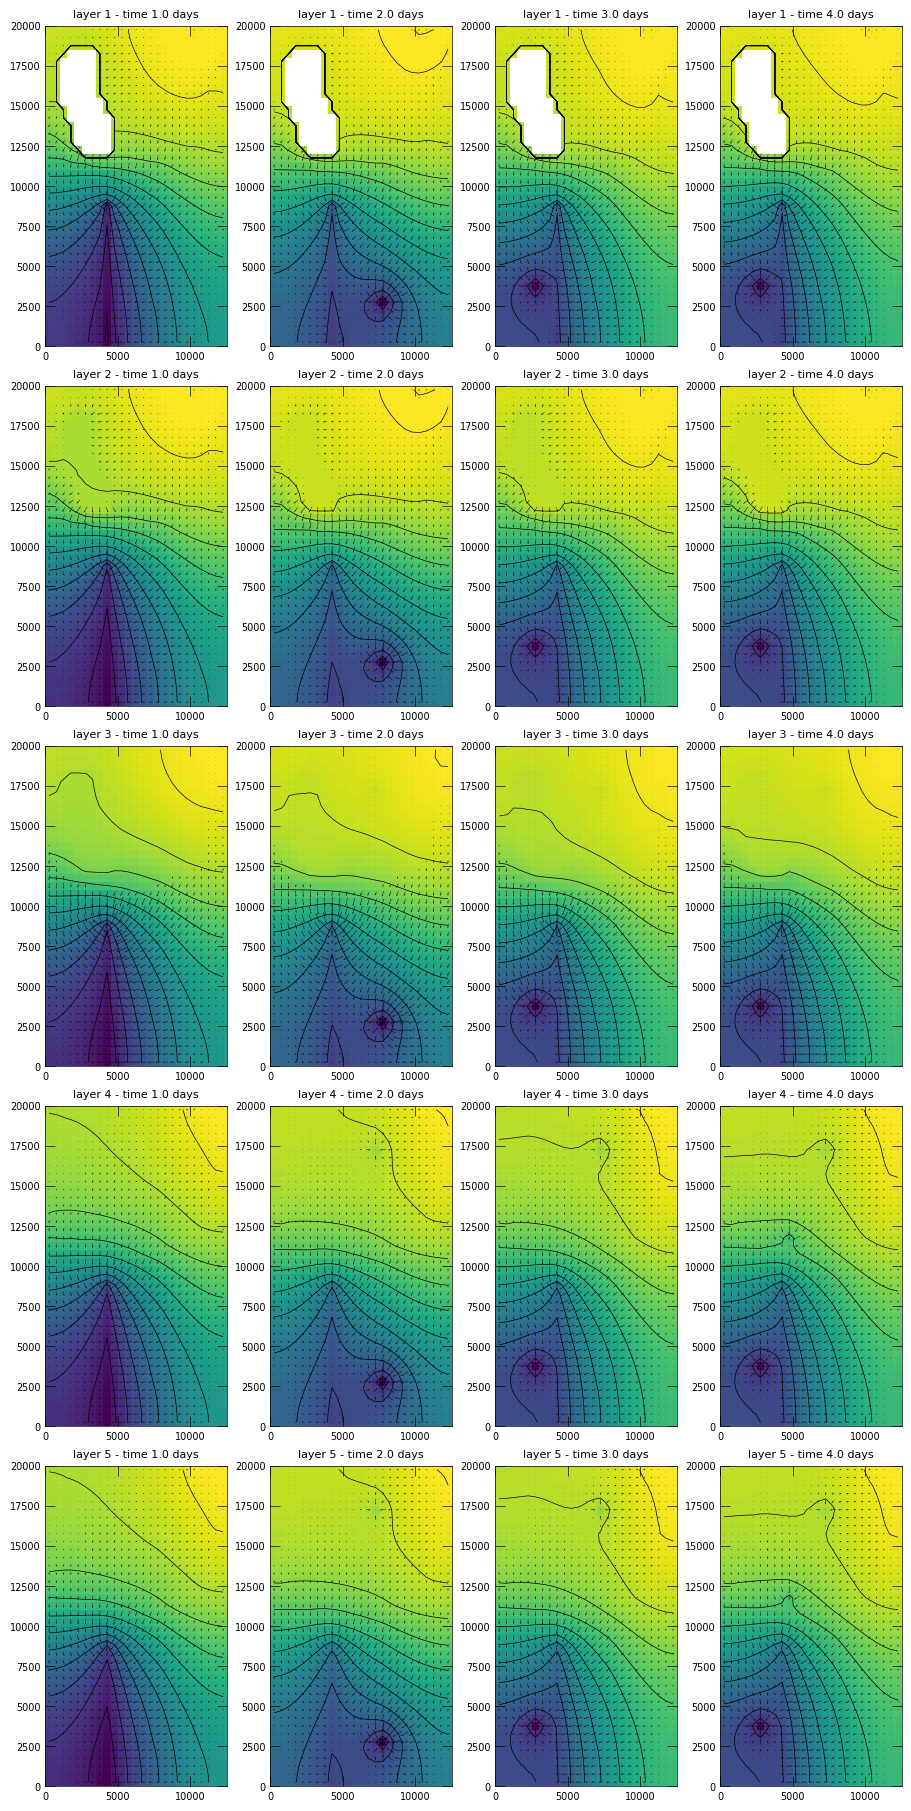

In [9]:
with styles.USGSMap():
    fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(9, 18), constrained_layout=True)
    axs = axs.flatten()
    idx = 0

    for layer in range(5):
        for totim in times:
            ax = axs[idx]
            mv = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=layer)
            
            head = hobj.get_data(totim=totim)
            spdis = cobj.get_data(text="DATA-SPDIS", totim=totim)
            qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis[0], gwf)
            
            h = mv.plot_array(head)
            c = mv.contour_array(head, levels=levels, linewidths=0.5, colors="black")
            mv.plot_vector(qx, qy)
            mv.ax.set_title(f"layer {layer + 1} - time {totim} days", fontsize=8)
            idx += 1
    

In [10]:
gwf.lak.output.obs().get_dataframe()

,totim,L1STAGE,GWFFLOW
1970-01-02,1.0,11.003732,33010.07343
1970-01-03,2.0,9.169055,44244.71163
1970-01-04,3.0,9.169322,25091.04280
1970-01-05,4.0,9.458597,74397.05712


In [11]:
gwf.sfr.output.obs().get_dataframe()

,totim,GWFFLOW,USSTAGE,DSSTAGE,DISCHARGE
1970-01-02,1.0,-884677.847182,1.413376,0.366649,-3.906282e+06
1970-01-03,2.0,-560383.978568,1.407523,0.328355,-3.581988e+06
1970-01-04,3.0,-541130.164682,1.408168,0.325705,-3.562734e+06
1970-01-05,4.0,-530424.995175,1.407614,0.324390,-3.552029e+06
